In [1]:
#Step 1: Load Libraries & Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("spam_ham_dataset.csv")
df = df[['text', 'label_num']]  # Drop unused columns
df.head()


,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
#Step 2: Preprocessing & Vectorization
# Feature and label
X = df['text']
y = df['label_num']

# Convert text to numerical features
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)


In [4]:
 #Step 3: Train-Test Split
 X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)


In [5]:
#Step 4: Model Training (Logistic Regression and Random Forest)
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [6]:
#Step 5: Evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

evaluate_model(y_test, lr_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest")



--- Logistic Regression ---
Confusion Matrix:
 [[731  11]
 [  4 289]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.96      0.99      0.97       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035

Accuracy Score: 0.9855072463768116

--- Random Forest ---
Confusion Matrix:
 [[725  17]
 [  9 284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       742
           1       0.94      0.97      0.96       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.97      0.97      1035

Accuracy Score: 0.9748792270531401


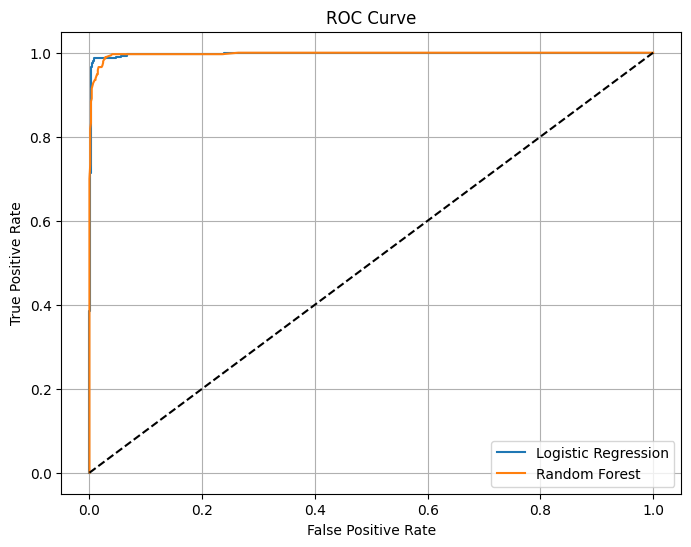

In [7]:
#Step 6: ROC Curve Comparison
lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, lr_probs)
fpr2, tpr2, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
#Step 7: Hyperparameter Tuning (Random Forest)
params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
evaluate_model(y_test, grid.predict(X_test), "Tuned Random Forest")


Best Parameters: {'max_depth': None, 'n_estimators': 100}

--- Tuned Random Forest ---
Confusion Matrix:
 [[725  17]
 [  7 286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       742
           1       0.94      0.98      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035

Accuracy Score: 0.9768115942028985


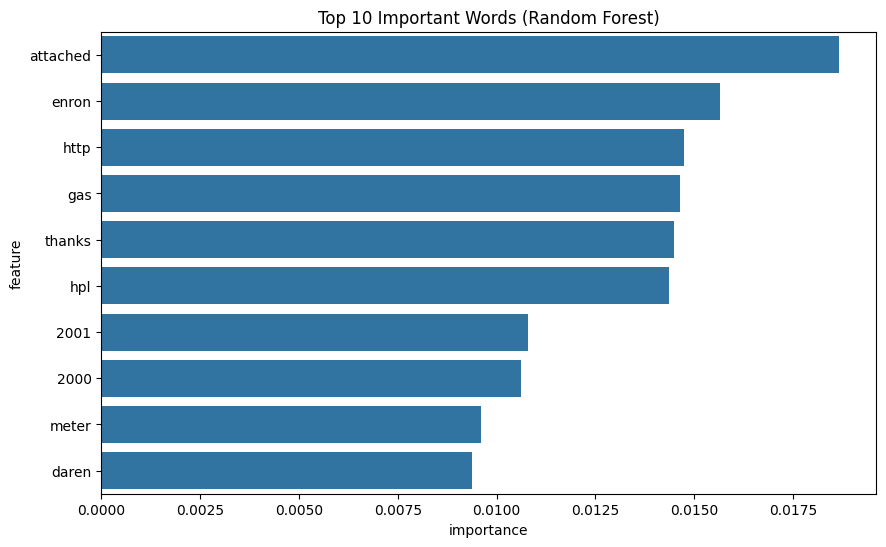

In [9]:
#Step 8: Feature Importance
# Feature importance from Random Forest
importances = rf.feature_importances_
features = vectorizer.get_feature_names_out()
imp_df = pd.DataFrame({'feature': features, 'importance': importances})
top10 = imp_df.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top10)
plt.title("Top 10 Important Words (Random Forest)")
plt.show()


In [10]:
# Compare at least two models(Bonus)
from sklearn.metrics import accuracy_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Logistic Regression Accuracy: 0.9855072463768116
Random Forest Accuracy: 0.9748792270531401


In [11]:
#Use GridSearchCV for Hyperparameter Tuning(Bonus)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy on Test Set:", accuracy_score(y_test, grid.best_estimator_.predict(X_test)))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy on Test Set: 0.9768115942028985


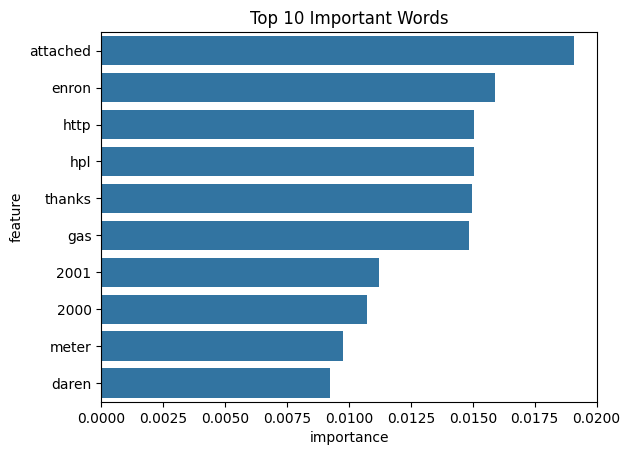

In [12]:
#Display Feature Importance(Bonus)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()
importances = grid.best_estimator_.feature_importances_

imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
top10 = imp_df.sort_values(by='importance', ascending=False).head(10)

sns.barplot(x='importance', y='feature', data=top10)
plt.title("Top 10 Important Words")
plt.show()
